In [3]:
import numpy as np
from matplotlib import pyplot as plt

In [4]:
data = np.loadtxt('q3/data/ratings.train.txt')
min_first_col = float('inf')
max_first_col = float('-inf')
min_second_col = float('inf')
max_second_col = float('-inf')

with open('q3/data/ratings.train.txt', 'r') as file:
    for line in file:
        user, movie, _ = map(float, line.split())
        min_first_col = min(min_first_col, user)
        max_first_col = max(max_first_col, user)
        min_second_col = min(min_second_col, movie)
        max_second_col = max(max_second_col, movie)

min_first_col, max_first_col, min_second_col, max_second_col

(1.0, 943.0, 1.0, 1682.0)

In [5]:
def compute_loss(P, Q, lam):
    loss = 0
    with open('q3/data/ratings.train.txt', 'r') as file:
        for line in file:
            user, movie, rating = map(float, line.split())
            user = int(user) - 1
            movie = int(movie) - 1
            error = rating - np.dot(P[user], Q[movie])
            loss += error ** 2
    
    for vec in P:
        loss += lam * np.linalg.norm(vec) ** 2
    for vec in Q:
        loss += lam * np.linalg.norm(vec) ** 2

    return loss

Initial loss: 233519.1915935503
Epoch 1 --> Error: 79361.95598735248
Epoch 2 --> Error: 74912.78254497574
Epoch 3 --> Error: 70415.55684004295
Epoch 4 --> Error: 65228.72341268709
Epoch 5 --> Error: 60157.10829434677
Epoch 6 --> Error: 55806.6854408815
Epoch 7 --> Error: 52245.70409196677
Epoch 8 --> Error: 49360.43245867337
Epoch 9 --> Error: 47008.6914885417
Epoch 10 --> Error: 45069.29688576586
Epoch 11 --> Error: 43450.108813154824
Epoch 12 --> Error: 42082.631131222384
Epoch 13 --> Error: 40915.42798756699
Epoch 14 --> Error: 39909.25235737032
Epoch 15 --> Error: 39033.755176152896
Epoch 16 --> Error: 38265.24510383184
Epoch 17 --> Error: 37585.10913829054
Epoch 18 --> Error: 36978.65392510532
Epoch 19 --> Error: 36434.22653337313
Epoch 20 --> Error: 35942.532538581356
Epoch 21 --> Error: 35496.1025273471
Epoch 22 --> Error: 35088.87580745458
Epoch 23 --> Error: 34715.878860138684
Epoch 24 --> Error: 34372.98029088277
Epoch 25 --> Error: 34056.70644538348
Epoch 26 --> Error: 33764

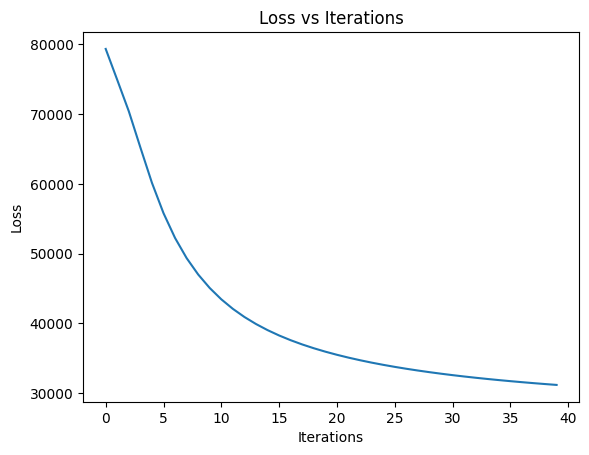

In [6]:
m, n = 943, 1682
K = 20
epochs = range(40)
lam = 0
eta = 0.01

np.random.seed(42)
Q = np.random.uniform(0, np.sqrt(5 / (K / 2)), size=(n, K)) 
P = np.random.uniform(0, np.sqrt(5 / (K / 2)), size=(m, K))

errors = []
print(f"Initial loss: {compute_loss(P, Q, lam)}")
for epoch in epochs:
    with open('q3/data/ratings.train.txt', 'r') as file:
        for line in file:
            user, movie, rating = map(float, line.split())
            user = int(user) - 1
            movie = int(movie) - 1

            error = 2 * (rating - np.dot(P[user], Q[movie]))
            update_p = error * Q[movie] - 2 * lam * P[user]
            update_q = error * P[user] - 2 * lam * Q[movie]

            P[user] += eta * update_p
            Q[movie] += eta * update_q
    errors.append(compute_loss(P, Q, lam))
    print(f'Epoch {epoch + 1} --> Error: {errors[-1]}')

print(f"\nMinimum error: {min(errors)}")
plt.plot(epochs, errors)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss vs Iterations')
plt.show()